<a href="https://colab.research.google.com/github/Chia-Yin-Lee/NTHU/blob/main/metric_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#@title connect google drive folder

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/thesis

Mounted at /content/drive
/content/drive/MyDrive/thesis


In [79]:
#@title import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import copy

In [113]:
sector = 'industrial'
file_pattern = f'{sector}_metrics*.csv'

# Use glob.glob to get a list of file names that match the pattern
file_list = glob.glob(file_pattern)

try:
  file_list.remove('healthcare_metrics_F+T.csv')
except:
  pass

# Create an empty list to store the dataframes
dfs = []

for file_name in file_list:
    fin_pattern = r'metrics.csv'
    df = pd.read_csv(file_name, index_col = False)

    try:
      del df['Unnamed: 0']
    except:
      pass

    dfs.append(df)
    match = re.search(fin_pattern, file_name)
    if match:
      index = file_list.index(file_name)
      file_name = file_name[:-11] + 'metrics_FIN.csv'
      file_list[index] = file_name

In [89]:
metrics = ['MAE', 'MAPE', 'MDAPE', 'RMSE', 'R2']

In [114]:
file_list

['industrial_metrics_FIN.csv',
 'industrial_metrics_SAE_1.csv',
 'industrial_metrics_SAE_0.csv',
 'industrial_metrics_SVD_1.csv',
 'industrial_metrics_SVD_0.csv',
 'industrial_metrics_PCA_1.csv',
 'industrial_metrics_PCA_0.csv']

In [115]:
# Extract the substrings between 'metrics_' and '.csv' and create a new list
file_shortlist = [item.split('metrics_')[1].split('.csv')[0] for item in file_list]

print(file_shortlist)

['FIN', 'SAE_1', 'SAE_0', 'SVD_1', 'SVD_0', 'PCA_1', 'PCA_0']


In [116]:
#@title combine all metrics in that sector

# Concatenate the dataframes along columns axis (axis=1) with column name prefixes
combined_df = pd.concat([df.add_prefix(f'{file_shortlist[i]}_') for i, df in enumerate(dfs)], axis=1)

combined_df = combined_df.set_index(pd.Index(metrics))
#combined_df.reset_index(inplace=True)
combined_df.columns = combined_df.columns.str.replace('_df', '')

print(combined_df)

       FIN_A17U  FIN_AJBU  FIN_BUOU  FIN_BWCU  FIN_DHLU  FIN_J91U  FIN_M1GU  \
MAE    0.027855  0.051430  0.014444  0.010192  0.005962  0.004695  0.006122   
MAPE   1.021021  2.412584  1.161276  3.604823  1.026542  1.459976  1.515822   
MDAPE  0.820444  2.539069  0.867776  3.312628  0.820159  1.360225  1.329119   
RMSE   0.034761  0.058646  0.019071  0.012359  0.007712  0.005641  0.007328   
R2     0.624733  0.337892  0.728373  0.312870  0.721867  0.667134  0.664959   

       FIN_M44U  FIN_ME8U  FIN_O5RU  ...  PCA_1_O5RU  PCA_0_AU8U  PCA_0_BMGU  \
MAE    0.021100  0.019004  0.015298  ...    0.023959    0.049342    0.013872   
MAPE   1.284636  0.857353  1.254722  ...    1.961993    5.113004    3.212804   
MDAPE  0.944454  0.885389  0.885066  ...    1.477127    5.212152    1.023218   
RMSE   0.026339  0.022009  0.021305  ...    0.031506    0.052486    0.026982   
R2     0.208864  0.433790  0.277470  ...   -0.580172   -2.812773   -0.392978   

       PCA_0_C38U  PCA_0_CEDU  PCA_0_CRPU  P

In [117]:
def avg_metric(standard, combined_df):

  # standard = 'FIN', 'PCA_0', 'PCA_1', 'SVD_0', 'SVD_1', 'SAE_0', 'SAE_1'

  filtered_columns = combined_df.filter(like=standard).columns.tolist()  # a list of filtered col names
  print(filtered_columns)
  # Calculate the means for each column group
  filtered_col_mean = combined_df[filtered_columns].mean(axis=1)
  filtered_col_mean_name = standard + '_Avg'

  return filtered_col_mean_name, filtered_col_mean

standard_list = ['FIN', 'PCA_0', 'PCA_1', 'SVD_0', 'SVD_1', 'SAE_0', 'SAE_1']
filtered_name_list = []
filtered_mean_list = []

for standard in standard_list:
  filtered_col_mean_name, filtered_col_mean = avg_metric(standard, combined_df)
  filtered_name_list.append(filtered_col_mean_name)
  filtered_mean_list.append(filtered_col_mean)
averaged_df = pd.DataFrame(dict(zip(filtered_name_list, filtered_mean_list)))


['FIN_A17U', 'FIN_AJBU', 'FIN_BUOU', 'FIN_BWCU', 'FIN_DHLU', 'FIN_J91U', 'FIN_M1GU', 'FIN_M44U', 'FIN_ME8U', 'FIN_O5RU']
['PCA_0_AU8U', 'PCA_0_BMGU', 'PCA_0_C38U', 'PCA_0_CEDU', 'PCA_0_CRPU', 'PCA_0_D5IU', 'PCA_0_J69U', 'PCA_0_P40U', 'PCA_0_SK6U']
['PCA_1_A17U', 'PCA_1_AJBU', 'PCA_1_BUOU', 'PCA_1_BWCU', 'PCA_1_DHLU', 'PCA_1_J91U', 'PCA_1_M1GU', 'PCA_1_M44U', 'PCA_1_ME8U', 'PCA_1_O5RU']
['SVD_0_A17U', 'SVD_0_AJBU', 'SVD_0_BUOU', 'SVD_0_BWCU', 'SVD_0_DHLU', 'SVD_0_J91U', 'SVD_0_M1GU', 'SVD_0_M44U', 'SVD_0_ME8U', 'SVD_0_O5RU']
['SVD_1_A17U', 'SVD_1_AJBU', 'SVD_1_BUOU', 'SVD_1_BWCU', 'SVD_1_DHLU', 'SVD_1_J91U', 'SVD_1_M1GU', 'SVD_1_M44U', 'SVD_1_ME8U', 'SVD_1_O5RU']
['SAE_0_A17U', 'SAE_0_AJBU', 'SAE_0_BUOU', 'SAE_0_BWCU', 'SAE_0_DHLU', 'SAE_0_J91U', 'SAE_0_M1GU', 'SAE_0_M44U', 'SAE_0_ME8U', 'SAE_0_O5RU']
['SAE_1_A17U', 'SAE_1_AJBU', 'SAE_1_BUOU', 'SAE_1_BWCU', 'SAE_1_DHLU', 'SAE_1_J91U', 'SAE_1_M1GU', 'SAE_1_M44U', 'SAE_1_ME8U', 'SAE_1_O5RU']


In [118]:
averaged_df

,FIN_Avg,PCA_0_Avg,PCA_1_Avg,SVD_0_Avg,SVD_1_Avg,SAE_0_Avg,SAE_1_Avg
MAE,0.017610,0.019723,0.019209,0.021795,0.018379,0.025369,0.021709
MAPE,1.559876,3.743207,1.987108,2.163668,1.805024,2.270465,2.277515
MDAPE,1.376433,3.013994,1.796966,1.978121,1.568946,1.857049,1.942740
RMSE,0.021517,0.023941,0.023630,0.025940,0.022843,0.030808,0.027171
R2,0.497795,-1.224810,0.169673,-0.056461,0.278158,-0.370581,-0.168358


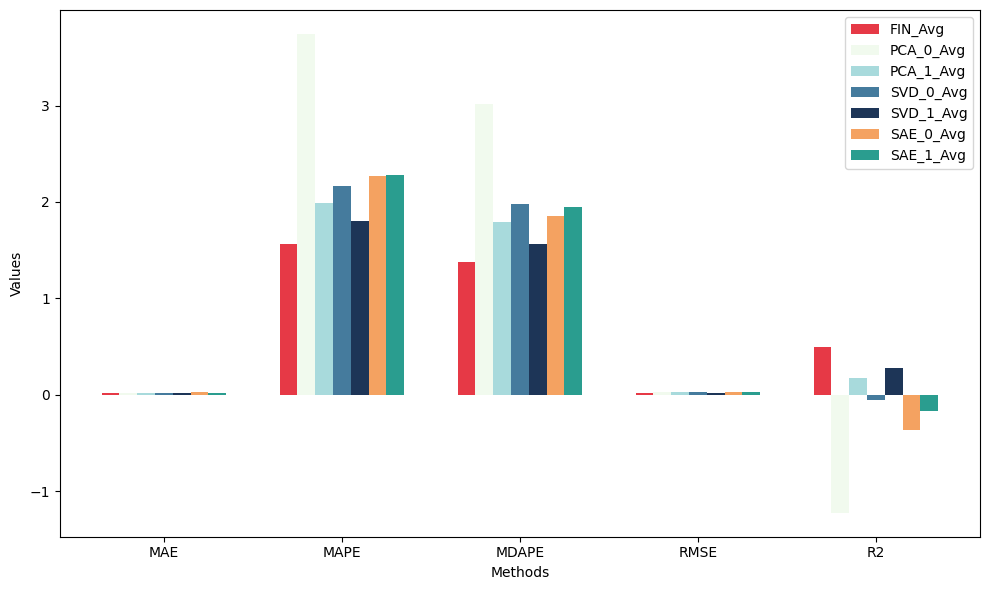

In [119]:
#@title generate a multi-bar plot

plt.figure(figsize=(10, 6))
x_labels = averaged_df.index

# Create an array for the x-axis positions
x = np.arange(len(x_labels))

bar_width = 0.1
colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557', '#F4A261', '#2A9D8F']

# Create bars for each value and position them properly
for i, col in enumerate(averaged_df.columns):
    plt.bar(x + (i - 3) * bar_width, averaged_df[col], width=bar_width, label=col, color=colors[i])

plt.xticks(x, x_labels)

# Add labels and a legend
plt.xlabel('Methods')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.savefig(f'{sector}_multibar_plot.png')
plt.show()

In [120]:
averaged_df.to_csv(f"metric_comparison_{sector}.csv", index = False)